In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

/Users/Lesley/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data = pd.read_csv('./e1data1.txt', header=None, names=['Population', 'Profit'])  
data.head()  

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


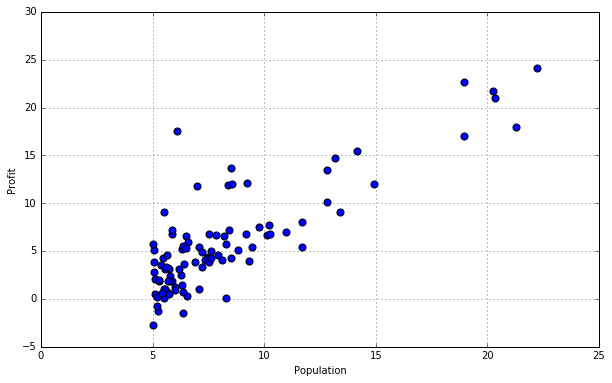

In [14]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,6), s=50)
plt.grid()

In [15]:
def costFunc(X, y, theta):
    inner = np.power((X*theta.T - y), 2)
    return np.sum(inner)/(2*len(X))

In [18]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [27]:
# set X (training data) and y (target variable)
cols = data.shape[1]  

X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 


In [29]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  

theta = np.matrix(np.array([0,0]))  

In [31]:
X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [32]:
costFunc(X, y, theta)

32.072733877455676

In [34]:
theta.ravel().shape


(1, 2)

In [36]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = costFunc(X, y, theta)

    return theta, cost
    

In [39]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g  

matrix([[-3.24140214,  1.1272942 ]])

In [48]:
# 4.5 is much smaller than 32
costFunc(X, y, g)

4.5159555030789118

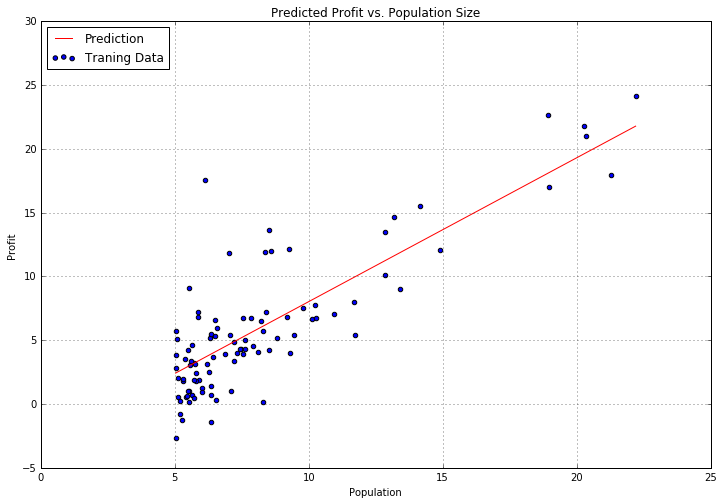

In [54]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size') 
plt.grid()

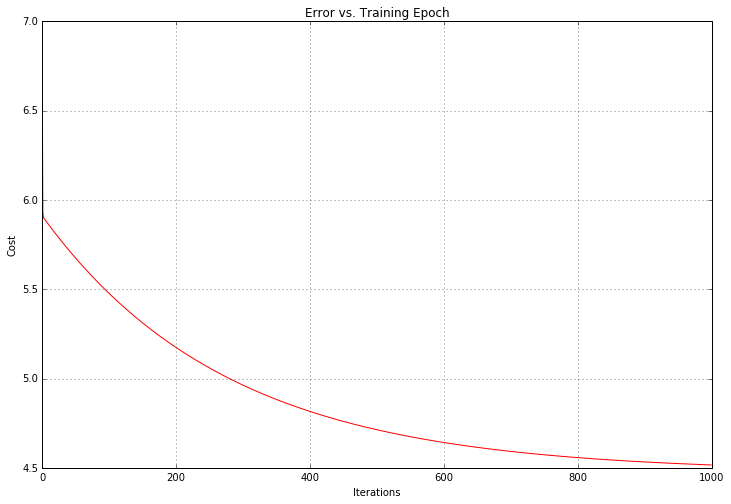

In [53]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
plt.grid()

In [56]:
data2 = pd.read_csv('./e1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head() 

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [57]:
# feature normalization
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [58]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]  
X2 = data2.iloc[:,0:cols-1]  
y2 = data2.iloc[:,cols-1:cols]


X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
theta2 = np.matrix(np.array([0,0,0]))  

In [59]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

costFunc(X2, y2, g2)  

0.13070336960771892

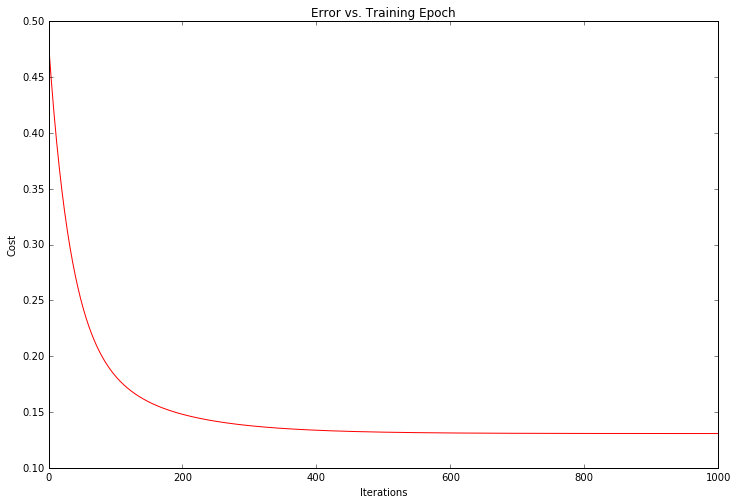

In [60]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [ ]:
x2 = np.linspace(data2.Population.min(), data2.Population.max(), 100)  
f2 = g2[0, 0] + (g2[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x2, f2, 'r', label='Prediction')  
ax.scatter(data2.Population, data2.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size') 
plt.grid()

In [61]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(X, y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

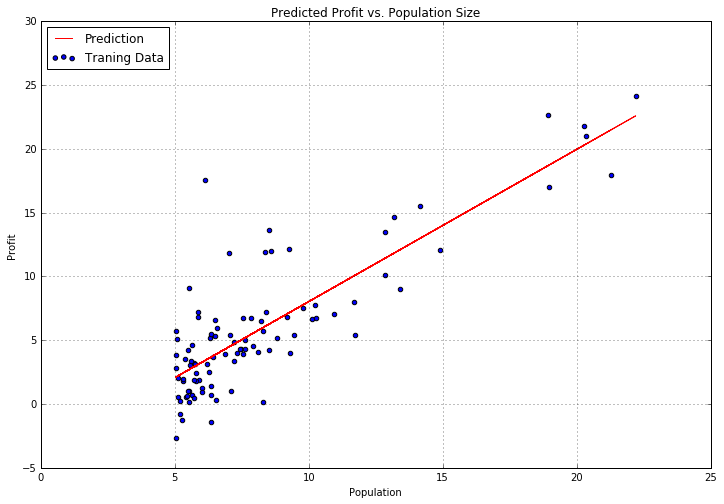

In [63]:
x = np.array(X[:, 1].A1)  
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  
plt.grid()